Data font: https://www.kaggle.com/datasets/waalbannyantudre/hate-speech-detection-curated-dataset/data

In [1]:
import tensorflow as tf

# Importar librerías necesarias
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
import pandas as pd

In [15]:
import matplotlib.pyplot as plt

In [3]:
data_new = pd.read_csv('HateSpeechDataset.csv')

In [4]:
 # Lista todas las GPUs disponibles
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    try:
        # Especifica una GPU particular (por índice, comenzando en 0)
        tf.config.set_visible_devices(gpus[0], 'GPU')  # Cambia "0" por el índice de la GPU que deseas usar

        # Opcional: Configura la memoria de la GPU para que sea limitada o dinámica
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

        print("GPU configurada correctamente:", gpus[0])
    except RuntimeError as e:
        # Errores ocurren si el dispositivo ya ha sido inicializado
        print("Error al configurar la GPU:", e)
else:
    print("No hay GPUs disponibles.")

GPU configurada correctamente: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [5]:
# Confirmar si TensorFlow está usando la GPU
print("TensorFlow ejecutándose en GPU:", tf.config.list_physical_devices('GPU'))

TensorFlow ejecutándose en GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [6]:
# Parámetros
MAX_VOCAB_SIZE = 20000  # Máximo número de palabras en el vocabulario
MAX_SEQUENCE_LENGTH = 100  # Longitud máxima de cada secuencia
EMBEDDING_DIM = 128  # Dimensión del embedding

In [7]:
# 1. Limpiar y tokenizar los textos
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(data_new['Content'])
sequences = tokenizer.texts_to_sequences(data_new['Content'])

# Aplicar padding a las secuencias
X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [8]:
# 2. Convertir las etiquetas en valores numéricos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data_new['Label'])

In [9]:
# 3. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# 4. Construcción de la red neuronal LSTM
model = Sequential([
    Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Salida binaria
])

In [11]:
# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
# 5. Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))



Epoch 1/10
5512/5512 [==============================] - 100s 17ms/step - loss: 0.2957 - accuracy: 0.8698 - val_loss: 0.2706 - val_accuracy: 0.8810
Epoch 2/10
5512/5512 [==============================] - 92s 17ms/step - loss: 0.2500 - accuracy: 0.8897 - val_loss: 0.2671 - val_accuracy: 0.8836
Epoch 3/10
5512/5512 [==============================] - 100s 18ms/step - loss: 0.2198 - accuracy: 0.9038 - val_loss: 0.2671 - val_accuracy: 0.8850
Epoch 4/10
5512/5512 [==============================] - 101s 18ms/step - loss: 0.1919 - accuracy: 0.9167 - val_loss: 0.2874 - val_accuracy: 0.8813
Epoch 5/10
5512/5512 [==============================] - 97s 18ms/step - loss: 0.1664 - accuracy: 0.9289 - val_loss: 0.3158 - val_accuracy: 0.8757
Epoch 6/10
5512/5512 [==============================] - 99s 18ms/step - loss: 0.1445 - accuracy: 0.9387 - val_loss: 0.3580 - val_accuracy: 0.8747
Epoch 7/10
5512/5512 [==============================] - 100s 18ms/step - loss: 0.1258 - accuracy: 0.9474 - val_loss: 0.37

In [13]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
loss, accuracy

2756/2756 [==============================] - 20s 7ms/step - loss: 0.4749 - accuracy: 0.8742


(0.47490209341049194, 0.8742486834526062)

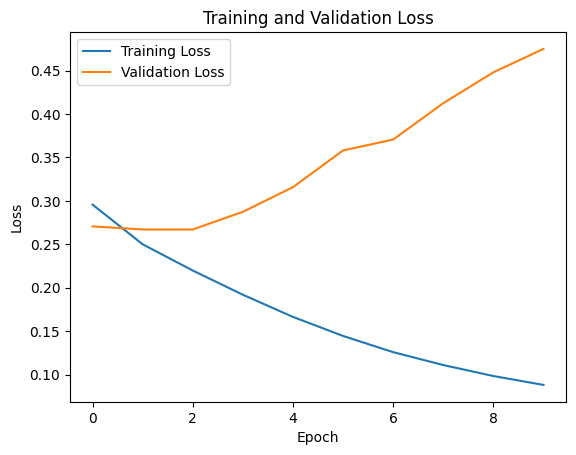

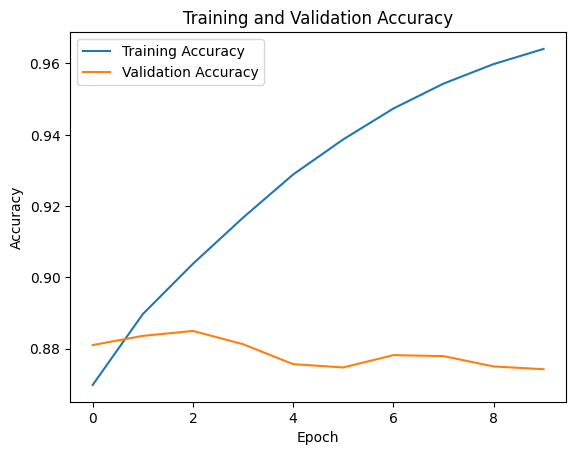

In [16]:
# Graficar la pérdida en el conjunto de entrenamiento y validación
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Graficar la precisión en el conjunto de entrenamiento y validación
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

Ojo! Hay que tener en cuenta que la categoría 1 está infrarepresentada.

In [17]:
from tensorflow.keras.models import save_model, load_model

In [18]:
# Función para guardar el modelo
def guardar_modelo(modelo, ruta_fichero):
    """
    Guarda un modelo entrenado en un archivo.

    Args:
    modelo (keras.Model): Modelo entrenado.
    ruta_fichero (str): Ruta donde se guardará el modelo.
    """
    modelo.save(ruta_fichero)
    print(f"Modelo guardado en: {ruta_fichero}")

In [19]:
# Función para cargar el modelo
def cargar_modelo(ruta_fichero):
    """
    Carga un modelo previamente guardado desde un archivo.

    Args:
    ruta_fichero (str): Ruta del archivo del modelo guardado.

    Returns:
    keras.Model: Modelo cargado.
    """
    modelo = load_model(ruta_fichero)
    print(f"Modelo cargado desde: {ruta_fichero}")
    return modelo

In [20]:
guardar_modelo(model, "RNNhateSpeechDataset.h5")

Modelo guardado en: RNNhateSpeechDataset.h5
